In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import re

# После импорта библеотек начинаем взять данные из сайта, через request и bs4 

In [2]:
url = "https://krisha.kz/prodazha/kvartiry/almaty/?das[map.complex]=0"

In [3]:
pr = []
zhk = []
dom = []
mkr = []
inf = []
kom = []
informat = soup.find_all("a", class_="a-card__title")
price = soup.find_all("div", class_="a-card__price")
zheloi =soup.find_all("div", class_="a-card__text-preview")
mikro = soup.find_all("div", class_="a-card__subtitle")
for i in range(0, len(price)):
    inf.append(re.findall('\d{3}|\d\d', informat[i].get_text())[0])
    kom.append(informat[i].get_text()[0])
    pr.append(''.join(filter(str.isdigit, price[i].text.strip().replace("\xa0", ""))))
    zhk.append(re.findall('^[^,]*', zheloi[i].get_text().replace("\n", "")[34:]))
    dom.append(re.findall('потолки (\d|\d.\d)м', zheloi[i].get_text()))
    mkr.append(re.findall('^[^,]*', mikro[i].get_text().replace(" ", "")[1:]))
dom_a = []
for l in range(0, len(dom)):
    for s in dom[l]:
        dom_a.append(s)
    if len(dom[l]) == 0:
        dom_a.append("0")
mkr_a = np.concatenate(mkr)
zhk_a = np.concatenate(zhk)
len(inf)

NameError: name 'soup' is not defined

In [ ]:
dataset = []
for k in range(0, len(price)):
    row = [
        inf[k],
        dom_a[k],
        mkr_a[k],
        zhk_a[k],
        kom[k],
        pr[k]]
    dataset.append(row)
print(dataset)

# Код для взятие данных почти готово 
Сделал это через re, numpy и циклы

In [70]:
def get_data(url):
    response = requests.get(url).text
    soup = BeautifulSoup(response, "lxml")
    pr, zhk, dom, mkr, inf, kom = [], [], [], [], [], []
    informat = soup.find_all("a", class_="a-card__title")
    price = soup.find_all("div", class_="a-card__price")
    zheloi =soup.find_all("div", class_="a-card__text-preview")
    mikro = soup.find_all("div", class_="a-card__subtitle")
    for i in range(0, len(price)):
        inf.append(re.findall('\d{3}|\d\d', informat[i].get_text())[0])
        kom.append(informat[i].get_text()[0])
        pr.append(''.join(filter(str.isdigit, price[i].text.strip().replace("\xa0", ""))))
        zhk.append(re.findall('^[^,]*', zheloi[i].get_text().replace("\n", "")[34:]))
        dom.append(re.findall('потолки (\d|\d.\d)м', zheloi[i].get_text()))
        mkr.append(re.findall('^[^,]*', mikro[i].get_text().replace(" ", "")[1:]))
    dom_a = []
    for l in range(0, len(dom)):
        for s in dom[l]:
            dom_a.append(s)
        if len(dom[l]) == 0:
            dom_a.append(None)
    mkr_a = np.concatenate(mkr)
    zhk_a = np.concatenate(zhk)
    dataset = []
    for k in range(0, len(price)):
        row = [
            inf[k],
            dom_a[k],
            mkr_a[k].replace("\n", ""),
            zhk_a[k],
            kom[k],
            pr[k]]
        dataset.append(row)
    return dataset

In [15]:
ds = []
for san in range(850):
    ds.append(get_data('https://krisha.kz/prodazha/kvartiry/almaty/?das[map.complex]=0&page='+str(san)))

In [17]:
ds

[[['90', '2.8', 'Наурызбайскийр-н', 'Alma City 4', '3', '50000000'],
  ['130', '2.8', 'Бостандыкскийр-н', 'Esentai Apartments', '3', '215000000'],
  ['57', '2.7', 'Алатаускийр-н', 'Алмалы', '2', '38000000'],
  ['64', '2.7', 'Алмалинскийр-н', '12 месяцев', '2', '45000000'],
  ['85', '0', 'Медеускийр-н', 'Vostochka.kz', '3', '48500000'],
  ['55', '0', 'Алмалинскийр-н', 'Алтын Булак', '2', '37000000'],
  ['56', '2.7', 'Жетысускийр-н', 'Dragon City', '3', '31500000'],
  ['55', '0', 'Бостандыкскийр-н', 'Jazz-квартал', '2', '45500000'],
  ['47', '2.7', 'Наурызбайскийр-н', 'Alem City', '1', '22000000'],
  ['47', '2.7', 'Наурызбайскийр-н', 'Alem City', '2', '22000000'],
  ['32', '2.7', 'Наурызбайскийр-н', 'Alma City', '1', '15000000'],
  ['78', '3', 'Наурызбайскийр-н', 'Munar Tau', '2', '46043600'],
  ['84', '3.3', 'Сейдимбек102', 'Munar Tau', '3', '48720000'],
  ['120', '3', 'Бостандыкскийр-н', 'AFD Plaza', '2', '650000'],
  ['42', '3.1', 'Наурызбайскийр-н', 'Munar Tau', '1', '25506000'],
  [

In [19]:
data = []
for k in range(len(ds)):
    for s in ds[k]:
        data.append(s)

In [20]:
df = pd.DataFrame(data,
                 columns = ["Площадь кв2", "Потолки", "Район", "ЖК", "Комната", "Цена"])
df

,Площадь кв2,Потолки,Район,ЖК,Комната,Цена
0,90,2.8,Наурызбайскийр-н,Alma City 4,3,50000000
1,130,2.8,Бостандыкскийр-н,Esentai Apartments,3,215000000
2,57,2.7,Алатаускийр-н,Алмалы,2,38000000
3,64,2.7,Алмалинскийр-н,12 месяцев,2,45000000
4,85,0,Медеускийр-н,Vostochka.kz,3,48500000
...,...,...,...,...,...,...
17001,30,2.8,Наурызбайскийр-н,Qalqaman,1,16300000
17002,82,3,Бостандыкскийр-н,Sky Hills,2,69990000
17003,22,2.8,Жетысускийр-н,ZHARKYN,1,15500000
17004,109,2.8,Бостандыкскийр-н,Esentai Apartments,3,175000000


In [26]:
df["ЖК"].unique()

array(['Alma City 4', 'Esentai Apartments', 'Алмалы', '12 месяцев',
       'Vostochka.kz', 'Алтын Булак', 'Dragon City', 'Jazz-квартал',
       'Alem City', 'Alma City', 'Munar Tau', 'AFD Plaza', 'Belgravia',
       'Lancashire', 'Alatau City', 'Ush Qońyr', 'Долина роз', 'Кокжиек',
       'Gulder', 'SOFIA', 'Аккент', 'Union', 'Меркур Град',
       'КУАТ на Сатпаева - Гагарина', 'Sunday Terrace', 'Алмаз', 'Oasis',
       'Aspen', 'Родник', 'Sicilia', 'Koksai Юбилейный', 'Aulet',
       'ORDA TOWN', 'Lifetown', 'Arena Park', 'Gate City', 'Хан-Тенгри',
       'Aqtolqyn Grand', 'Green City', 'Nova Park', 'Apple Residence',
       'Millennium Park', 'Nest grand', 'Sunny Village',
       'Etasa Residence', 'Admiral', 'AL’FARABI 27', 'Estet',
       'Miras Park', 'Seven Hills', 'METROPOLE', 'Riviera', 'Auezov City',
       'Nurly Dala', 'Primavera', 'Тан Нуры', 'Amir', 'Ресми Групп',
       'ONER', 'Central Avenue', 'Presidents Park', '4YOU', 'Ala Park',
       '', 'PARASAT', ' монолитный дом

In [53]:
coun_less_10 = []
for m in df['ЖК'].unique():
    element = m
    coun = np.count_nonzero(df['ЖК'] == m)
    if coun <= 10:
        print(m, ": ", coun)
        coun_less_10.append(m)

Belgravia :  3
Sunday Terrace :  4
Алмаз :  5
Oasis :  3
Родник :  9
Koksai Юбилейный :  5
ORDA TOWN :  10
Gate City :  7
Nova Park :  2
Sunny Village :  4
Ресми Групп :  3
Green :  3
Altyn-Ai :  6
Vertu Hills :  1
ANAYAT :  4
Nova 23 :  2
Айнабулак 33/2 :  2
Sky Villa :  9
Jana Qainar :  3
Космо :  8
Достар Deluxe :  6
Dostar :  8
4Hills :  5
Горная Долина :  7
Ремизовка :  9
Alasha Residence :  7
Реал Алматы :  9
Hill Town Residence :  7
ал :  3
Арман Вилла :  7
 Райымбека :  3
Evim Novo :  6
Мкр Жетысу-3 :  10
Куаныш :  7
Chocolate :  10
Центральный на Тулебаева :  2
ЖК в мкр. Саялы :  7
д :  6
Belle View :  1
Ария :  4
ЖК на Ташкентской :  6
La Grace :  3
ого :  3
Базис на Зенкова 33 :  3
Four Seasons Villa :  5
Сарыарка :  9
Рапсодия :  10
Seneca :  5
Баракат :  2
Клубный дом REGENT :  5
Саялы :  3
Qargaly City :  10
Наурыз-2 :  9
Достар :  7
Цюрих :  6
Академия-2 :  2
Оркен :  7
Баганашил Севен Старс :  7
Grande vie :  7
Family Club :  4
МЖК по ул. Исаева :  2
ВЕК на Байганина : 

In [63]:
len(coun_less_10)

323

In [62]:
df2 = df[~df["ЖК"].isin(coun_less_10)]
df2

,Площадь кв2,Потолки,Район,ЖК,Комната,Цена
0,90,2.8,Наурызбайскийр-н,Alma City 4,3,50000000
1,130,2.8,Бостандыкскийр-н,Esentai Apartments,3,215000000
2,57,2.7,Алатаускийр-н,Алмалы,2,38000000
3,64,2.7,Алмалинскийр-н,12 месяцев,2,45000000
4,85,0,Медеускийр-н,Vostochka.kz,3,48500000
...,...,...,...,...,...,...
17000,100,3,Бостандыкскийр-н,Айгерим,3,77000000
17001,30,2.8,Наурызбайскийр-н,Qalqaman,1,16300000
17002,82,3,Бостандыкскийр-н,Sky Hills,2,69990000
17004,109,2.8,Бостандыкскийр-н,Esentai Apartments,3,175000000


In [66]:
df[df["ЖК"]=="Esentai Apartments"]

,Площадь кв2,Потолки,Район,ЖК,Комната,Цена
1,130,2.8,Бостандыкскийр-н,Esentai Apartments,3,215000000
24,130,2.8,Бостандыкскийр-н,Esentai Apartments,3,215000000
454,82,2.8,Бостандыкскийр-н,Esentai Apartments,2,129000000
666,182,2.8,Бостандыкскийр-н,Esentai Apartments,4,282100000
669,143,2.8,Бостандыкскийр-н,Esentai Apartments,3,221650000
...,...,...,...,...,...,...
16218,109,2.8,Бостандыкскийр-н,Esentai Apartments,3,175000000
16225,109,2.8,Бостандыкскийр-н,Esentai Apartments,3,178500000
16331,85,2.8,Бостандыкскийр-н,Esentai Apartments,2,180000000
16945,187,2.9,Бостандыкскийр-н,Esentai Apartments,4,250000000


In [67]:
df2.isnull().sum()

Площадь кв2    0
Потолки        0
Район          0
ЖК             0
Комната        0
Цена           0
dtype: int64

In [69]:
df2[df["Потолки"]=="0"]

C:\Users\Admin\AppData\Local\Temp\ipykernel_4256\3915194069.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[df["Потолки"]=="0"]


,Площадь кв2,Потолки,Район,ЖК,Комната,Цена
4,85,0,Медеускийр-н,Vostochka.kz,3,48500000
5,55,0,Алмалинскийр-н,Алтын Булак,2,37000000
7,55,0,Бостандыкскийр-н,Jazz-квартал,2,45500000
15,76,0,Наурызбайскийр-н,Alem City,3,31000000
19,58,0,Алатаускийр-н,Alatau City,2,39500000
...,...,...,...,...,...,...
16992,60,0,Наурызбайскийр-н,Alma City 5,2,27500000
16993,38,0,Бостандыкскийр-н,Акварель,1,35000000
16994,105,0,Бостандыкскийр-н,Верный,3,140000000
16995,100,0,Бостандыкскийр-н,Jazz-квартал,3,98000000


In [75]:
df["Потолки"]

0        2.8
1        2.8
2        2.7
3        2.7
4          0
        ... 
17001    2.8
17002      3
17003    2.8
17004    2.8
17005    3.2
Name: Потолки, Length: 17006, dtype: object

In [78]:
pot = []
for it in df2["Потолки"]:
    pot.append(float(it))
df2["Ппотолки"] = pot
df2

C:\Users\Admin\AppData\Local\Temp\ipykernel_4256\3904871871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Ппотолки"] = pot


,Площадь кв2,Потолки,Район,ЖК,Комната,Цена,Ппотолки
0,90,2.8,Наурызбайскийр-н,Alma City 4,3,50000000,2.8
1,130,2.8,Бостандыкскийр-н,Esentai Apartments,3,215000000,2.8
2,57,2.7,Алатаускийр-н,Алмалы,2,38000000,2.7
3,64,2.7,Алмалинскийр-н,12 месяцев,2,45000000,2.7
4,85,0,Медеускийр-н,Vostochka.kz,3,48500000,0.0
...,...,...,...,...,...,...,...
17000,100,3,Бостандыкскийр-н,Айгерим,3,77000000,3.0
17001,30,2.8,Наурызбайскийр-н,Qalqaman,1,16300000,2.8
17002,82,3,Бостандыкскийр-н,Sky Hills,2,69990000,3.0
17004,109,2.8,Бостандыкскийр-н,Esentai Apartments,3,175000000,2.8


In [79]:
df2.drop(["Потолки"], axis="columns")

,Площадь кв2,Район,ЖК,Комната,Цена,Ппотолки
0,90,Наурызбайскийр-н,Alma City 4,3,50000000,2.8
1,130,Бостандыкскийр-н,Esentai Apartments,3,215000000,2.8
2,57,Алатаускийр-н,Алмалы,2,38000000,2.7
3,64,Алмалинскийр-н,12 месяцев,2,45000000,2.7
4,85,Медеускийр-н,Vostochka.kz,3,48500000,0.0
...,...,...,...,...,...,...
17000,100,Бостандыкскийр-н,Айгерим,3,77000000,3.0
17001,30,Наурызбайскийр-н,Qalqaman,1,16300000,2.8
17002,82,Бостандыкскийр-н,Sky Hills,2,69990000,3.0
17004,109,Бостандыкскийр-н,Esentai Apartments,3,175000000,2.8


In [84]:
df2["Ппотолки"]

0        2.8
1        2.8
2        2.7
3        2.7
4        0.0
        ... 
17000    3.0
17001    2.8
17002    3.0
17004    2.8
17005    3.2
Name: Ппотолки, Length: 15732, dtype: float64

In [85]:
df2["Ппотолки"] = df2["Ппотолки"].replace(0.0, str(df2["Ппотолки"].mean()))

C:\Users\Admin\AppData\Local\Temp\ipykernel_4256\1998603748.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Ппотолки"] = df2["Ппотолки"].replace(0.0, str(df2["Ппотолки"].mean()))


In [86]:
df2["Ппотолки"]

0                       2.8
1                       2.8
2                       2.7
3                       2.7
4        2.2511695906432743
                ...        
17000                   3.0
17001                   2.8
17002                   3.0
17004                   2.8
17005                   3.2
Name: Ппотолки, Length: 15732, dtype: object

In [87]:
df2["Район"].unique()

array(['Наурызбайскийр-н', 'Бостандыкскийр-н', 'Алатаускийр-н',
       'Алмалинскийр-н', 'Медеускийр-н', 'Жетысускийр-н', 'Сейдимбек102',
       'Абишева3', 'Торекулова', 'Ауэзовскийр-н', 'Турксибскийр-н',
       'Утегенбатыра11', 'Торекулова32', 'МикрорайонКайрат303',
       'Просп.Назарбаева—Райымбека', 'Сатпаева90/161—Тлендиева',
       'Утегенбатыра11—ТолеБи', 'Ырысты46/6', 'Райымбека483—Азияпарка',
       'Талапты34/1к1', 'Просп.Назарбаева28', 'Манаса109а',
       'Сейфуллина—1вокзал', 'Бокейханова510Б', 'Калкаман4Б',
       'АскароваАсанбая21', 'Тлендиева133—Сатпаева', 'Торекулова91блок5',
       'Кенесарыхана54', 'Райымбека210', 'Гагарина310',
       'Сатпаева90—Туркебаева', 'МикрорайонКайрат303/9—Кульджинскийтракт',
       'Райымбека259', 'Рахат21/17', 'Макатаева131—Муратбаева',
       'Гагарина277/7', 'Омаровой', 'Навои7',
       'МикрорайонКайрат157/1—проспектРыскулова', 'Аль-Фараби21',
       'Нуркент', 'Макатаева—Муратбаева', 'Аль-Фараби77/3',
       'Жунисова14/17', 'Микро

In [88]:
df["Комната"].unique()

array(['3', '2', '1', '5', '4', '7', '6', '8', '9'], dtype=object)

In [94]:
less_20 = []
for rai in df['Район'].unique():
    element = rai
    coun = np.count_nonzero(df['Район'] == rai)
    if coun <= 20:
        less_20.append(rai)
less_20

['Сейдимбек102',
 'Абишева3',
 'МикрорайонПКАкжол',
 'ПКЖемис1а/1',
 'МикрорайонАйжарык1в',
 'МТФ3',
 'квартал27270',
 'Торекулова',
 'Алатаускаятрасса',
 'Утегенбатыра11',
 'Торекулова32',
 'Туздыбастау',
 'Алатаускаятрасса33ж',
 'Бухтарминская4/2—Кульджинскийтракт',
 'п.Бесагаш',
 'МикрорайонКайрат303',
 'Просп.Назарбаева—Райымбека',
 'Сатпаева90/161—Тлендиева',
 'Утегенбатыра11—ТолеБи',
 'Ырысты46/6',
 'Райымбека483—Азияпарка',
 'Талапты34/1к1',
 'Просп.Назарбаева28',
 'Манаса109а',
 'Сейфуллина—1вокзал',
 'Бокейханова510Б',
 'Калкаман4Б',
 'Райымбекбатыра275',
 'Раимбека275',
 'АскароваАсанбая21',
 'Тлендиева133—Сатпаева',
 'Торекулова91блок5',
 'Кенесарыхана54',
 'Райымбека210',
 'Гагарина310',
 'Шаймерденова32',
 'Сатпаева90—Туркебаева',
 'МикрорайонКайрат303/9—Кульджинскийтракт',
 'Райымбека259',
 'Рахат21/17',
 'Макатаева131—Муратбаева',
 'Гагарина277/7',
 'Омаровой',
 'Навои7',
 'МикрорайонКайрат157/1—проспектРыскулова',
 'Аль-Фараби21',
 'Нуркент',
 'Макатаева—Муратбаева',
 '

In [97]:
df3 = df2[~df2["Район"].isin(less_20)]
df4 = df3.loc[:, ["Площадь кв2", "Район", "ЖК", "Комната", "Цена", "Ппотолки"]]
df4

,Площадь кв2,Район,ЖК,Комната,Цена,Ппотолки
0,90,Наурызбайскийр-н,Alma City 4,3,50000000,2.8
1,130,Бостандыкскийр-н,Esentai Apartments,3,215000000,2.8
2,57,Алатаускийр-н,Алмалы,2,38000000,2.7
3,64,Алмалинскийр-н,12 месяцев,2,45000000,2.7
4,85,Медеускийр-н,Vostochka.kz,3,48500000,2.2511695906432743
...,...,...,...,...,...,...
17000,100,Бостандыкскийр-н,Айгерим,3,77000000,3.0
17001,30,Наурызбайскийр-н,Qalqaman,1,16300000,2.8
17002,82,Бостандыкскийр-н,Sky Hills,2,69990000,3.0
17004,109,Бостандыкскийр-н,Esentai Apartments,3,175000000,2.8


In [108]:
m2 = []
for met in df4["Площадь кв2"]:
    m2.append(float(met))


In [109]:
df4["Площадь квметр"] = m2

,Площадь кв2,Район,ЖК,Комната,Цена,Ппотолки,Площадь квметр
0,90,Наурызбайскийр-н,Alma City 4,3,50000000,2.8,90.0
1,130,Бостандыкскийр-н,Esentai Apartments,3,215000000,2.8,130.0
2,57,Алатаускийр-н,Алмалы,2,38000000,2.7,57.0
3,64,Алмалинскийр-н,12 месяцев,2,45000000,2.7,64.0
4,85,Медеускийр-н,Vostochka.kz,3,48500000,2.2511695906432743,85.0
...,...,...,...,...,...,...,...
17000,100,Бостандыкскийр-н,Айгерим,3,77000000,3.0,100.0
17001,30,Наурызбайскийр-н,Qalqaman,1,16300000,2.8,30.0
17002,82,Бостандыкскийр-н,Sky Hills,2,69990000,3.0,82.0
17004,109,Бостандыкскийр-н,Esentai Apartments,3,175000000,2.8,109.0


In [156]:
kona = []
prices = []
for _ in df4["Комната"]:
    kona.append(float(_))
for cnn in df4["Цена"]:
    prices.append(float(cnn))
df4["Кол.комнат"] = kona
df4["Prices"] = prices
df5 = df4.loc[:, ["Район", "ЖК", "Prices", "Ппотолки", "Площадь квметр", "Кол.комнат"]]
df5

,Район,ЖК,Prices,Ппотолки,Площадь квметр,Кол.комнат
0,Наурызбайскийр-н,Alma City 4,50000000.0,2.8,90.0,3.0
1,Бостандыкскийр-н,Esentai Apartments,215000000.0,2.8,130.0,3.0
2,Алатаускийр-н,Алмалы,38000000.0,2.7,57.0,2.0
3,Алмалинскийр-н,12 месяцев,45000000.0,2.7,64.0,2.0
4,Медеускийр-н,Vostochka.kz,48500000.0,2.2511695906432743,85.0,3.0
...,...,...,...,...,...,...
17000,Бостандыкскийр-н,Айгерим,77000000.0,3.0,100.0,3.0
17001,Наурызбайскийр-н,Qalqaman,16300000.0,2.8,30.0,1.0
17002,Бостандыкскийр-н,Sky Hills,69990000.0,3.0,82.0,2.0
17004,Бостандыкскийр-н,Esentai Apartments,175000000.0,2.8,109.0,3.0


In [157]:
df5["Район"].unique()

array(['Наурызбайскийр-н', 'Бостандыкскийр-н', 'Алатаускийр-н',
       'Алмалинскийр-н', 'Медеускийр-н', 'Жетысускийр-н', 'Ауэзовскийр-н',
       'Турксибскийр-н'], dtype=object)

In [158]:
df5[df5["ЖК"]=="монолитный дом"]
sin = ['и','к','литный дом','монолитный дом','олитный дом','олитный дом','онолитный дом', "нолитный дом","2","3","5"]
df6 = df5[~df5["ЖК"].isin(sin)]

In [159]:
df7 = pd.get_dummies(df6["Район"])
df8 = pd.get_dummies(df6["ЖК"])
df9 = df8.drop(["", ' монолитный дом'], axis='columns')
df9

,12 месяцев,4YOU,ABAI CITY,ADELE,AFD Plaza,ALMA VILLA,AL’FARABI 27,Abay 130,Admiral,Ala Park,...,Хан-Тенгри,Центральный,Шанырак,Шахристан,Швейцария,Шугыла,Шугыла-Сити,Ырысты,Эдельвейс,Эдельвейс (КГ)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [187]:
df6.to_csv("almaty_city_analys.xlsx", index=False)

In [7]:
df6 = pd.read_csv("almaty_city_analys.xlsx")
df6

,Район,ЖК,Prices,Ппотолки,Площадь квметр,Кол.комнат
0,Наурызбайскийр-н,Alma City 4,50000000.0,2.80000,90.0,3.0
1,Бостандыкскийр-н,Esentai Apartments,215000000.0,2.80000,130.0,3.0
2,Алатаускийр-н,Алмалы,38000000.0,2.70000,57.0,2.0
3,Алмалинскийр-н,12 месяцев,45000000.0,2.70000,64.0,2.0
4,Медеускийр-н,Vostochka.kz,48500000.0,2.25117,85.0,3.0
...,...,...,...,...,...,...
14818,Бостандыкскийр-н,Айгерим,77000000.0,3.00000,100.0,3.0
14819,Наурызбайскийр-н,Qalqaman,16300000.0,2.80000,30.0,1.0
14820,Бостандыкскийр-н,Sky Hills,69990000.0,3.00000,82.0,2.0
14821,Бостандыкскийр-н,Esentai Apartments,175000000.0,2.80000,109.0,3.0


In [8]:
columns_to_encode = ["Район", "ЖК"]
df10 = pd.get_dummies(df6, columns=columns_to_encode)
df10

,Prices,Ппотолки,Площадь квметр,Кол.комнат,Район_Алатаускийр-н,Район_Алмалинскийр-н,Район_Ауэзовскийр-н,Район_Бостандыкскийр-н,Район_Жетысускийр-н,Район_Медеускийр-н,...,ЖК_Хан-Тенгри,ЖК_Центральный,ЖК_Шанырак,ЖК_Шахристан,ЖК_Швейцария,ЖК_Шугыла,ЖК_Шугыла-Сити,ЖК_Ырысты,ЖК_Эдельвейс,ЖК_Эдельвейс (КГ)
0,50000000.0,2.80000,90.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,215000000.0,2.80000,130.0,3.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38000000.0,2.70000,57.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45000000.0,2.70000,64.0,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,48500000.0,2.25117,85.0,3.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14818,77000000.0,3.00000,100.0,3.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14819,16300000.0,2.80000,30.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14820,69990000.0,3.00000,82.0,2.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
14821,175000000.0,2.80000,109.0,3.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
x = df10["Prices"]/1000000
max(df10["Площадь квметр"])

800.0

Text(0, 0.5, 'Площадь')

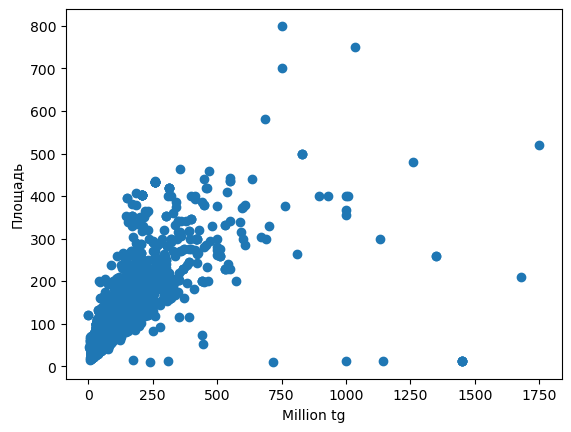

In [11]:
plt.scatter(x, df6["Площадь квметр"])
plt.xlabel("Million tg")
plt.ylabel("Площадь")

In [14]:
labels, freqs = np.unique(df6['Район'], return_counts=True)

sorted_freqs_ix = np.argsort(freqs)[::-1]

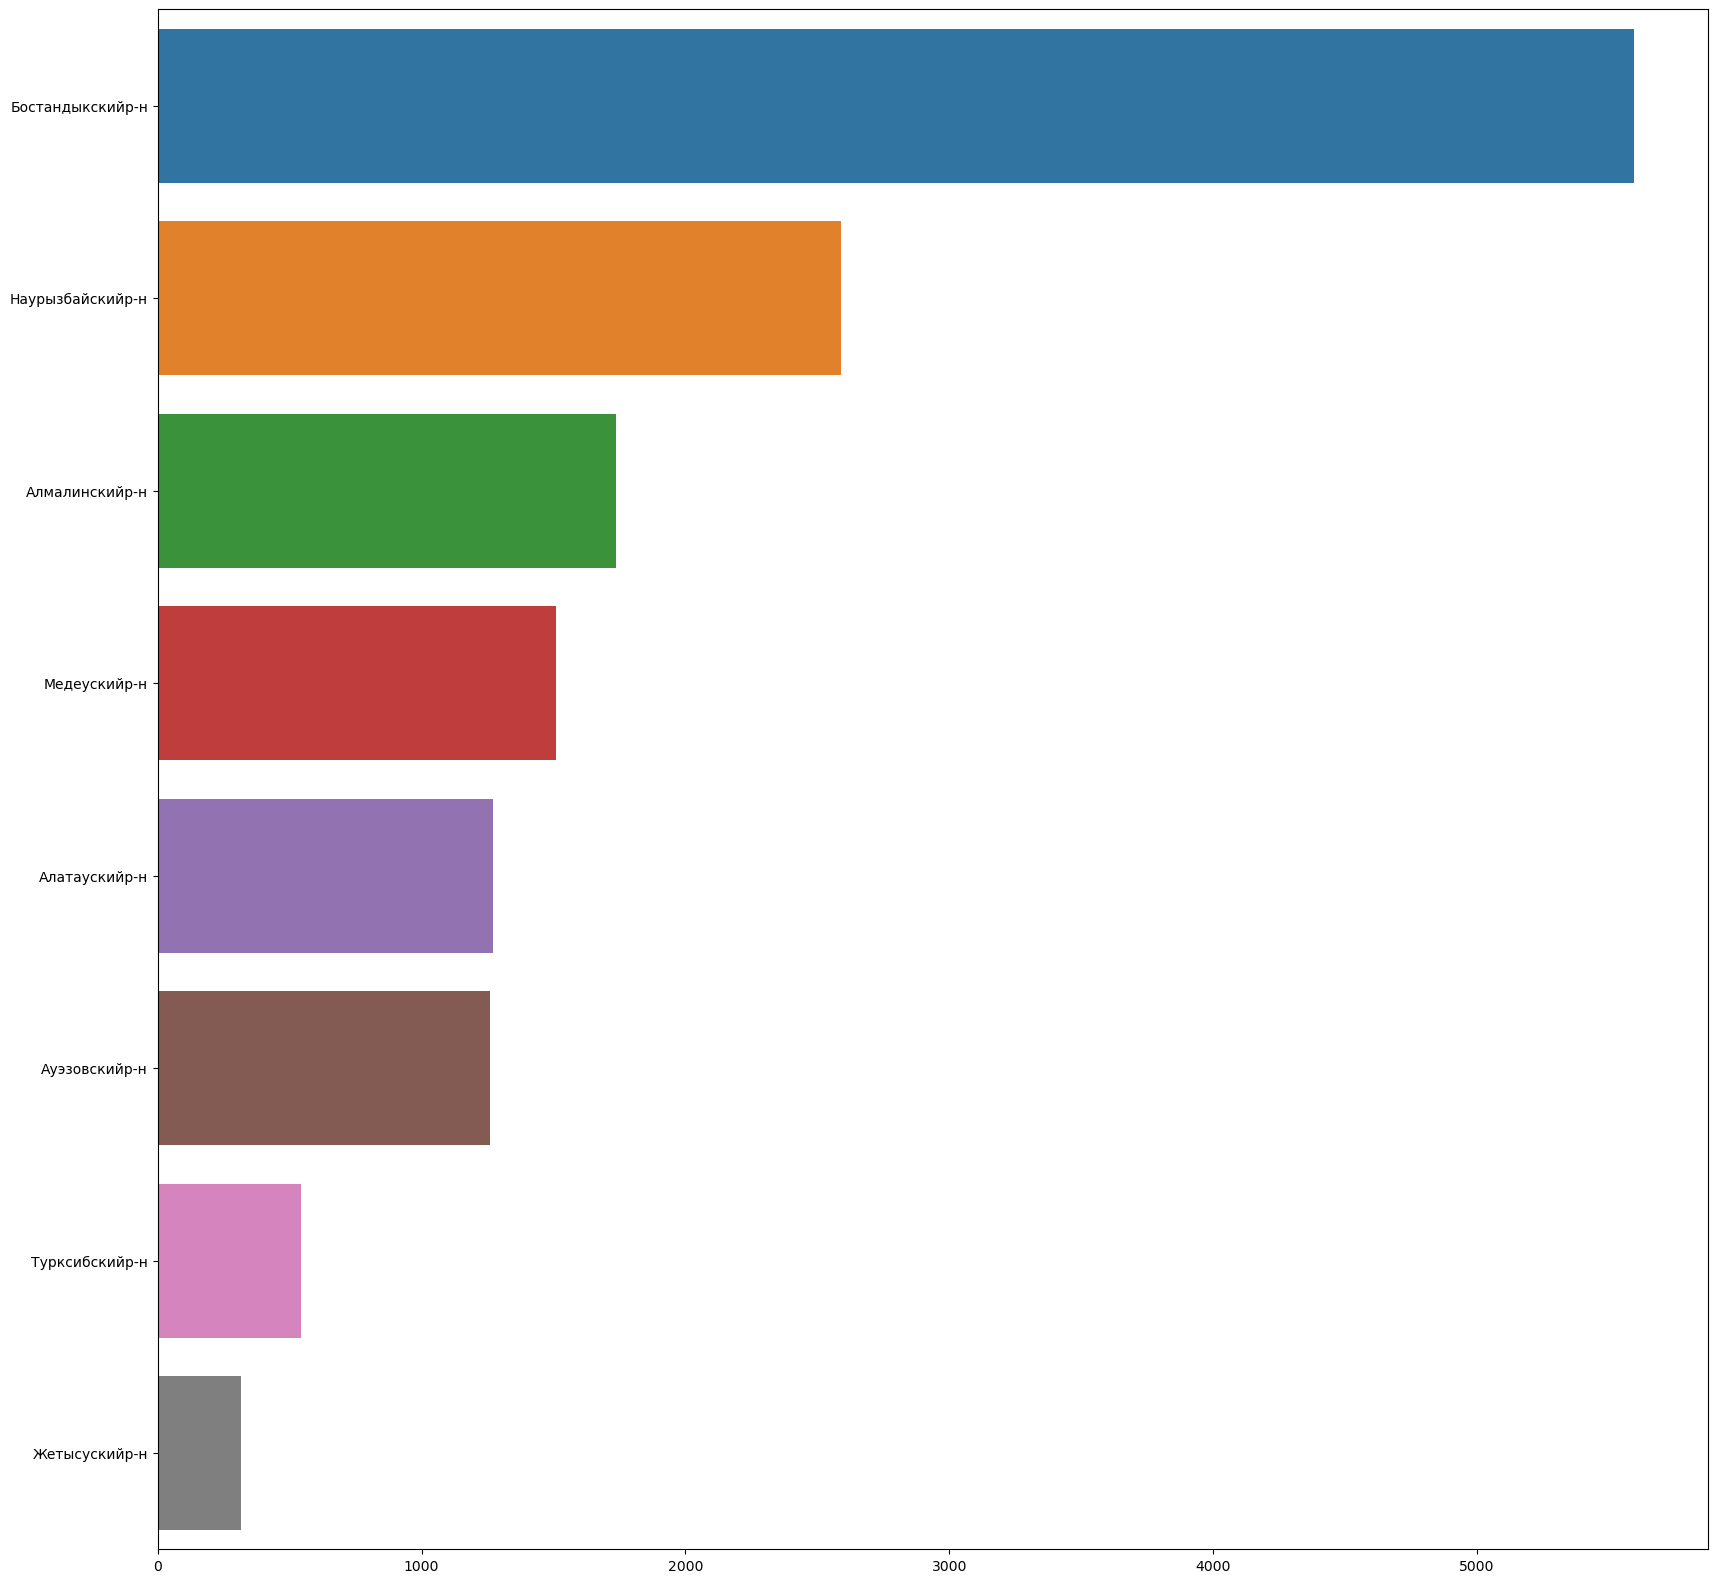

In [15]:
plt.figure(figsize=(20, 20))
sns.barplot(y=labels[sorted_freqs_ix], x=freqs[sorted_freqs_ix]);

Text(0, 0.5, 'Район')

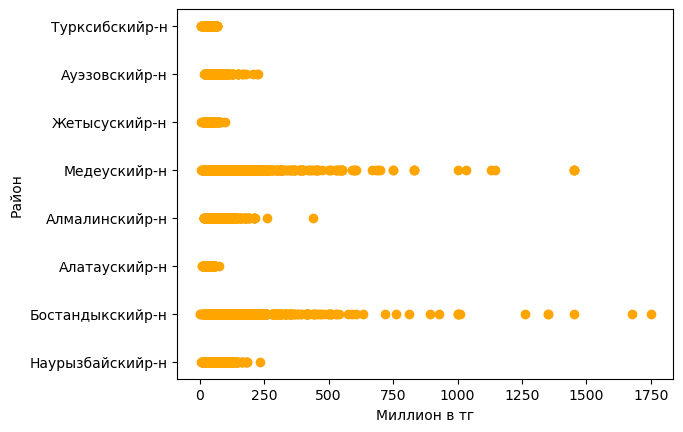

In [12]:
plt.scatter(x, df6["Район"], color="orange")
plt.xlabel("Миллион в тг")
plt.ylabel("Район")

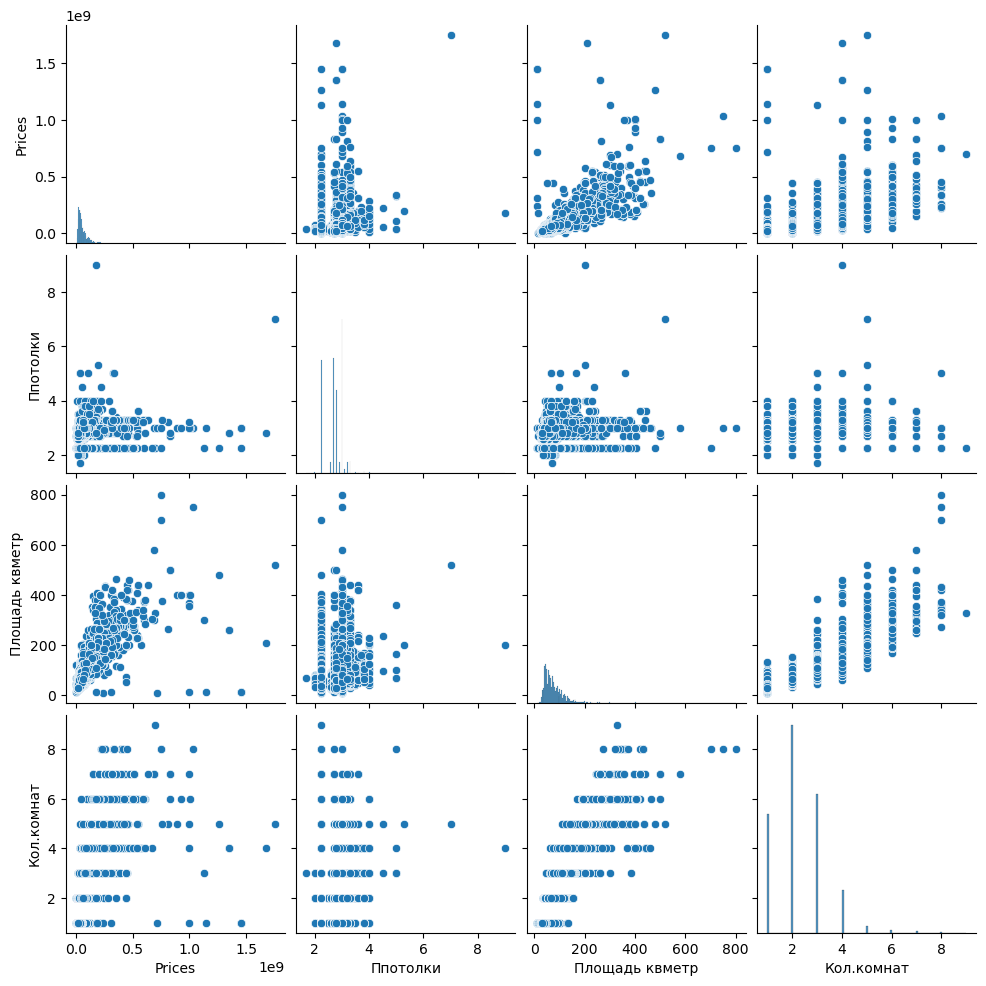

In [13]:
sns.pairplot(df6)

# Обучение модели

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline


X = df10.drop(["Prices"], axis="columns")
y = df10["Prices"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [115]:
model_selection_df = pd.DataFrame(columns=['clf', 'name', 'accuracy train',"accuracy test"])

In [116]:
params = {
    'fit_intercept': [True, False],
    'n_jobs': [None, -1]
}

lnr_grid_search = GridSearchCV(LinearRegression(), params, cv=5)
lnr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [None, -1]})

In [117]:
lnr_grid_search.best_params_

{'fit_intercept': True, 'n_jobs': None}

In [118]:
def score(clf, name, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    tr = clf.score(X_train, y_train)
    ts = clf.score(X_test, y_test)
    arr = {"clf": clf, "name": name, "accuracy train": tr, "accuracy test": ts}
    return arr
res = score(lnr_grid_search, "LinearRegression")
model_selection_df = model_selection_df.append(res, ignore_index=True) 
model_selection_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_17884\79603173.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_selection_df = model_selection_df.append(res, ignore_index=True)


,clf,name,accuracy train,accuracy test
0,"GridSearchCV(cv=5, estimator=LinearRegression(...",LinearRegression,0.758613,0.735717


In [119]:
knn = {
    "n_neighbors": [2, 5, 10],
    "weights": ['uniform', 'distance']
    }

knn_grid_search = GridSearchCV(KNeighborsRegressor(), knn, cv=5)
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 5, 10],
                         'weights': ['uniform', 'distance']})

In [121]:
knn_grid_search.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [122]:
res = score(knn_grid_search, "KNeighborsRegressor")
model_selection_df = model_selection_df.append(res, ignore_index=True) 
model_selection_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_17884\2563930843.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_selection_df = model_selection_df.append(res, ignore_index=True)


,clf,name,accuracy train,accuracy test
0,"GridSearchCV(cv=5, estimator=LinearRegression(...",LinearRegression,0.758613,0.735717
1,"GridSearchCV(cv=5, estimator=KNeighborsRegress...",KNeighborsRegressor,0.990316,0.832695


In [124]:
dcr = {
    'max_depth': [None, 2, 5, 7],
    'min_samples_split': [2, 5, 17],        
    'min_samples_leaf': [1, 2, 4],          
    'max_features': ['auto', 'sqrt', 'log2'] 
}

dcr_grid_search = GridSearchCV(DecisionTreeRegressor(), dcr, cv=5)
dcr_grid_search.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-packag

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 2, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 17]})

In [125]:
dcr_grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 17}

In [126]:
res = score(dcr_grid_search, "DecisionTreeRegressor")
model_selection_df = model_selection_df.append(res, ignore_index=True) 
model_selection_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_17884\1250307635.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_selection_df = model_selection_df.append(res, ignore_index=True)


,clf,name,accuracy train,accuracy test
0,"GridSearchCV(cv=5, estimator=LinearRegression(...",LinearRegression,0.758613,0.735717
1,"GridSearchCV(cv=5, estimator=KNeighborsRegress...",KNeighborsRegressor,0.990316,0.832695
2,"GridSearchCV(cv=5, estimator=DecisionTreeRegre...",DecisionTreeRegressor,0.877904,0.800045


In [133]:
rfr = {
    'n_estimators': [5, 10, 20],     
    'max_depth': [None, 2, 5, 7],    
    'min_samples_split': [2, 5, 7],     
    'min_samples_leaf': [1, 2, 4],      
    'max_features': ['auto', 'sqrt', 'log2']  
}

rfr_grid_search = GridSearchCV(RandomForestRegressor(), rfr, cv=5)
rfr_grid_search.fit(X_train, y_train)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Admin\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 2, 5, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [5, 10, 20]})

In [134]:
rfr_grid_search.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 20}

In [135]:
res = score(rfr_grid_search, "RandomForestRegressor")
model_selection_df = model_selection_df.append(res, ignore_index=True) 
model_selection_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_17884\3058213419.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  model_selection_df = model_selection_df.append(res, ignore_index=True)


,clf,name,accuracy train,accuracy test
0,"GridSearchCV(cv=5, estimator=LinearRegression(...",LinearRegression,0.758613,0.735717
1,"GridSearchCV(cv=5, estimator=KNeighborsRegress...",KNeighborsRegressor,0.990316,0.832695
2,"GridSearchCV(cv=5, estimator=DecisionTreeRegre...",DecisionTreeRegressor,0.877904,0.800045
3,"GridSearchCV(cv=5, estimator=RandomForestRegre...",RandomForestRegressor,0.907877,0.943348


# Итог
Этот проект создан для анализа домов в городе Алматы.
Лучшим алгоритмом был выбран случайный лес с точностью в обучающих данных 90.07% 
и с точностью в тестовых данных 94.33% с параметрами. Я хотел обучить модель по другим алгоритмам, но другие алгоритмы требовали больше времени и с ужасной точностью. 
{'max_depth': None,
'max_features': 'log2',
'min_samples_leaf': 1,
'min_samples_split': 2,
'n_estimators': 20}